In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


silhouette_score :

Calcule le coefficient de silhouette pour mesurer à quel point les points de données dans un cluster sont proches des autres points de leur cluster, tout en étant éloignés des autres clusters.

Le score varie entre -1 et 1 :

1 : Les clusters sont bien séparés et compacts.

0 : Les clusters se chevauchent.

-1 : Mauvais clustering (les points sont attribués au mauvais cluster).

In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


on remarque qu'Il n'y a aucune valeur manquante dans le dataset, ce qui nous simplifiera les analyses à venir

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Le dataset contient une diversité d'âges, mais la majorité des clients sont dans une tranche d'âge jeune à moyen (28-49 ans). Cela peut influencer les habitudes de consommation.

Le score reflète les comportements ou habitudes d'achat. Les scores élevés  correspondent  à des clients fidèles ou à forte dépense, tandis que les scores faibles  indiquerent des clients moins actifs.

In [ ]:
scaler = StandardScaler()
features_numeriques = df.select_dtypes(include=['int64', 'float64'])
X = df[features_numeriques.columns]
X_scaled = scaler.fit_transform(X)


Les variables numériques (comme l'âge, le revenu annuel et le score de dépense) ont été standardisées avec StandardScaler. Cela transforme les données pour qu'elles aient une moyenne de 0 et un écart type de 1, ce qui est essentiel pour des algorithmes sensibles à l'échelle des données.

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,Male,-1.424569,-1.738999,-0.434801
1,-1.706091,Male,-1.281035,-1.738999,1.195704
2,-1.688771,Female,-1.352802,-1.700830,-1.715913
3,-1.671450,Female,-1.137502,-1.700830,1.040418
4,-1.654129,Female,-0.563369,-1.662660,-0.395980


In [ ]:
def ApplyGaussian(X,nb_clusters):
    gmm=GaussianMixture(n_components=nb_clusters)
    gmm.fit(X)
    labels=gmm.predict(X)
    return gmm,labels

In [ ]:
def visualize_clusters(X,labels):

  reducer=TSNE(n_components=2,random_state=42)
  X_reduced=reducer.fit_transform(X)

  plt.figure(figsize=(10,7))
  scatter=plt.scatter(X_reduced[:,0],X_reduced[:,1],c=labels,cmap='rainbow')
  plt.colorbar(scatter)
  plt.title('Clusters')
  plt.show()

In [ ]:
#optimisation de nombre des clusters
log_likelihood=[]
for i in range(1,11):
  gmm,labels=ApplyGaussian(X_scaled,i)
  log_likelihood.append(gmm.score(X_scaled))
print(log_likelihood)

[-4.0593352086441445, -3.2377875116149597, -2.5319450594527098, -2.634899977794711, -2.0335982199240017, -1.947229161486136, -1.6750147748018298, -1.654069582405107, -1.553863611741552, -1.2712360965486609]


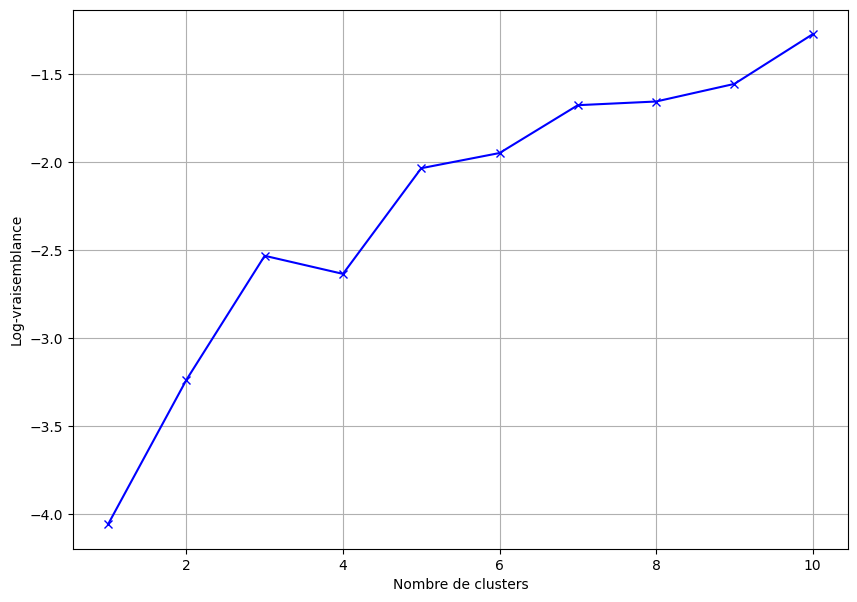

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),log_likelihood,'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Log-vraisemblance')
plt.grid(True)
plt.show()

Le nombre optimal de clusters est 8, car la log-vraisemblance se stabilise après cette valeur.

In [ ]:
optimal_nb_clusters=5
gmm,labels=ApplyGaussian(X_scaled,optimal_nb_clusters)
X_reduced=reducer.fit_transform(X_scaled)

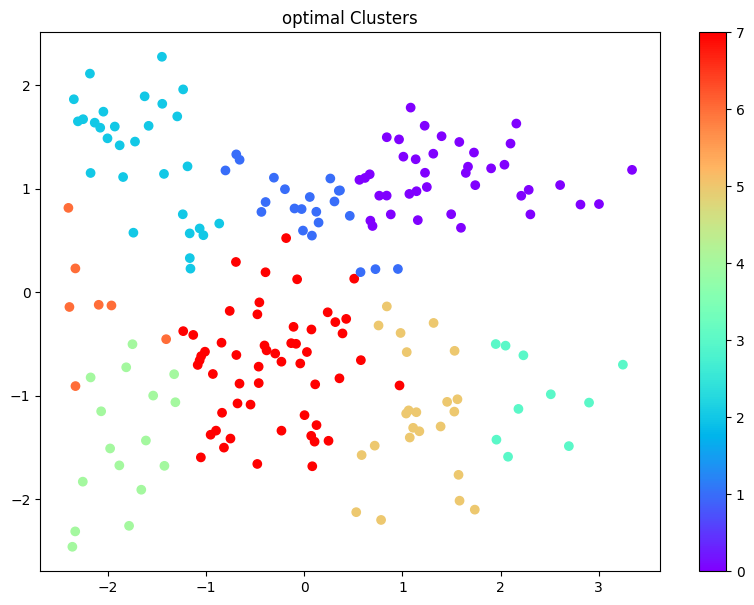

In [ ]:
plt.figure(figsize=(10,7))
scatter=plt.scatter(X_reduced[:,0],X_reduced[:,1],c=labels,cmap='rainbow')
plt.colorbar(scatter)
plt.title('optimal Clusters')
plt.show()

Chaque point représente un client, positionné en fonction des deux composantes principales qui capturent la majorité de la variance des données originales.
Les différentes couleurs indiquent les clusters auxquels les clients ont été assignés.
Les clusters sont  bien séparés, ce qui suggère que l'algorithme a réussi à diviser les clients en groupes distincts.

In [ ]:
optimal_nb_clusters=9
gmm,labels=ApplyGaussian(X_scaled,optimal_nb_clusters)
reducer=PCA(n_components=2)
X_reduced=reducer.fit_transform(X_scaled)

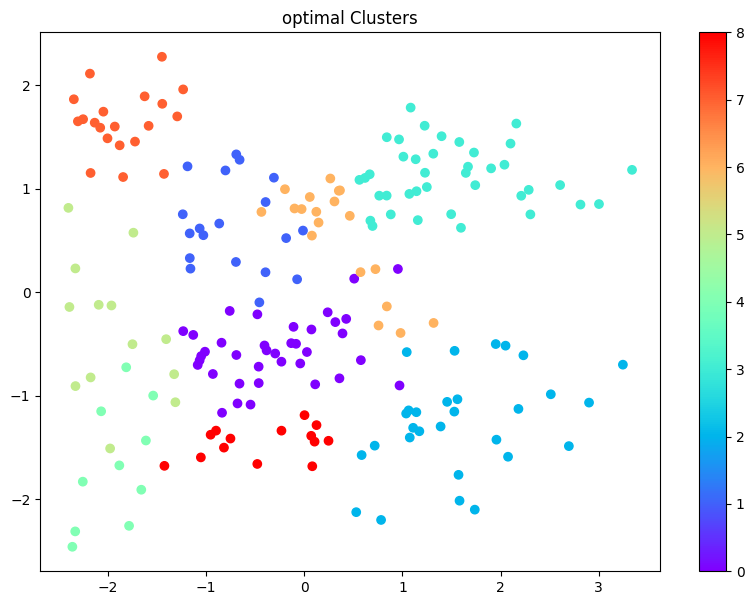

In [ ]:
plt.figure(figsize=(10,7))
scatter=plt.scatter(X_reduced[:,0],X_reduced[:,1],c=labels,cmap='rainbow')
plt.colorbar(scatter)
plt.title('optimal Clusters')
plt.show()

In [ ]:
def evaluer_clusters(X,labels):
  silhouette=silhouette_score(X,labels)
  davies_bouldin=davies_bouldin_score(X,labels)
  return silhouette,davies_bouldin

In [ ]:
silhouette,davies_bouldin=evaluer_clusters(X_scaled,labels)
print(f'silhouette: {silhouette}')
print(f'davies_bouldin: {davies_bouldin}')

silhouette: 0.35918448416458043
davies_bouldin: 0.9383418476818967


In [ ]:
def ApplyKmeans(X,nb_clusters):
  kmeans=KMeans(n_clusters=nb_clusters,random_state=42)
  kmeans.fit(X)
  labels=kmeans.predict(X)
  return kmeans,labels


In [ ]:
optimal_scores=9
kmeans,labels=ApplyKmeans(X_scaled,optimal_scores)
print("centres des clusters: ",kmeans.cluster_centers_)

centres des clusters:  [[-0.32003975  1.25526464 -0.26166879 -0.03158663]
 [ 1.47630309 -0.5203085   1.60718743  1.16464682]
 [-1.3648731  -1.00473366 -1.35921337  1.19570407]
 [ 0.85564379 -0.010765    0.6618579  -1.40145834]
 [-1.02784826 -0.77866858 -0.9515036  -0.14261815]
 [-1.30554962  0.79571317 -1.2690381  -1.30586025]
 [ 0.05549047 -0.85043527  0.0535503  -0.09403445]
 [ 1.44281636  0.4892096   1.58174114 -1.11288474]
 [ 0.80830048 -0.39292263  0.60683031  1.28628771]]


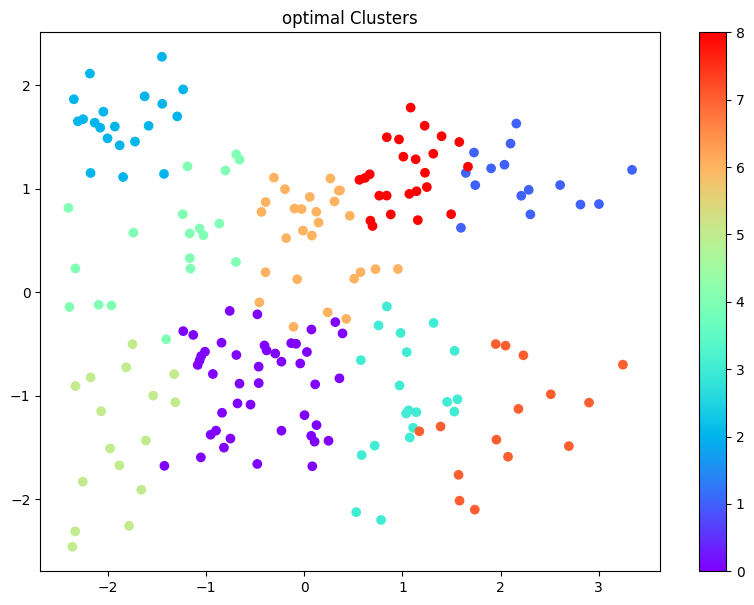

In [ ]:
reducer=PCA(n_components=2)
X_reduced=reducer.fit_transform(X_scaled)
plt.figure(figsize=(10,7))
scatter=plt.scatter(X_reduced[:,0],X_reduced[:,1],c=labels,cmap='rainbow')
plt.colorbar(scatter)
plt.title('optimal Clusters')
plt.show()

Difference entre k-Means et GMM :

les 2 sont des algorithmes de clustering mais sont differents.

k-Means attribue chaque point de donnees au cluster de ses voisins les plus proches randis que GMM introduisent une approche probabiliste en modelisant les points de donnees comme un melange de plusieurs distributions gaussiennes.